<a href="https://colab.research.google.com/github/Yewon9/OpenCV_AIRLab/blob/main/addtion_rgba_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow

In [2]:
import cv2
import numpy as np

In [3]:
#합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('girl.jpg')

In [4]:
#알파 채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

In [6]:
#전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w]

In [7]:
#마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

In [8]:
#이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

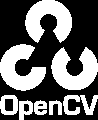

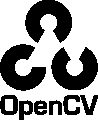

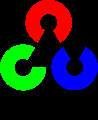

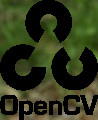

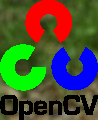

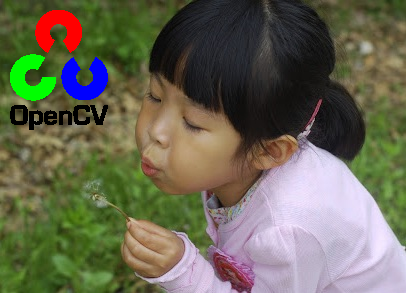

In [9]:
cv2_imshow(mask)
cv2_imshow(mask_inv)
cv2_imshow(masked_fg)
cv2_imshow(masked_bg)
cv2_imshow(added)
cv2_imshow(img_bg)